# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.477175
b    0.579850
c    0.896675
d    0.783712
e    2.024798
dtype: float64
a         NaN
b    1.159700
c    1.793350
d    1.567425
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-01-03
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00     9.087473
2021-11-23 12:45:00     9.161147
2021-11-24 12:45:00    11.648203
2021-11-25 12:45:00     9.051931
Freq: D, dtype: float64 

2021-11-22 12:45:00    9.087473
2021-11-23 12:45:00    9.161147
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-1.366249,-0.073889,-1.698144,-0.519571
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,-0.279964
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,1.705301
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,-0.170200
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,1.025577
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,1.076622
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,-0.580714
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,-1.261821
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,0.445711
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,-0.129018


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-1.366249,-0.073889,-1.698144,-0.519571
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,-0.279964


In [13]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,-0.580714
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,-1.261821
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,0.445711
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,-0.129018


In [14]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-1.36624858, -0.07388857, -1.69814419, -0.51957067],
       [-0.34439263, -0.38258467,  1.25583908, -0.27996425],
       [-0.37564005, -0.46532708,  1.23485548,  1.70530105],
       [ 1.54009924,  0.8245663 , -0.26737546, -0.17020028],
       [-0.13604397,  0.34045741,  1.26071985,  1.02557707],
       [ 1.22030289,  1.07032235, -0.82135889,  1.07662163],
       [-0.07450826,  0.73177778,  1.81718569, -0.58071448],
       [-0.74164408,  1.43082823, -0.22109724, -1.26182084],
       [ 0.93515831,  0.57840066, -0.15207945,  0.4457115 ],
       [-0.789627  , -0.70404857,  0.51172212, -0.12901835]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.013254,0.335050,0.292027,0.131192
std,0.946207,0.714935,1.110779,0.910976
min,-1.366249,-0.704049,-1.698144,-1.261821
25%,-0.650143,-0.305411,-0.255806,-0.459669
50%,-0.240218,0.459429,0.179821,-0.149609
75%,0.682742,0.801369,1.250593,0.880611
max,1.540099,1.430828,1.817186,1.705301


In [18]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-1.366249,-0.344393,-0.375640,1.540099,-0.136044,1.220303,-0.074508,-0.741644,0.935158,-0.789627
B,-0.073889,-0.382585,-0.465327,0.824566,0.340457,1.070322,0.731778,1.430828,0.578401,-0.704049
C,-1.698144,1.255839,1.234855,-0.267375,1.260720,-0.821359,1.817186,-0.221097,-0.152079,0.511722
D,-0.519571,-0.279964,1.705301,-0.170200,1.025577,1.076622,-0.580714,-1.261821,0.445711,-0.129018


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-1.366249,-0.073889,-1.698144,-0.519571
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,-0.279964
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,1.705301
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,-0.170200
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,1.025577
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,1.076622
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,-0.580714
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,-1.261821
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,0.445711
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,-0.129018


In [20]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 12:45:00,-1.366249,-0.073889,-1.698144,-0.519571
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,1.076622
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,-0.170200
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,-1.261821
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,0.445711
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,-0.129018
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,1.705301
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,-0.279964
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,1.025577
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,-0.580714


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00   -1.366249
2021-11-22 13:45:00   -0.344393
2021-11-22 14:45:00   -0.375640
2021-11-22 15:45:00    1.540099
2021-11-22 16:45:00   -0.136044
2021-11-22 17:45:00    1.220303
2021-11-22 18:45:00   -0.074508
2021-11-22 19:45:00   -0.741644
2021-11-22 20:45:00    0.935158
2021-11-22 21:45:00   -0.789627
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -1.366249
2021-11-22 13:45:00   -0.344393
2021-11-22 14:45:00   -0.375640
2021-11-22 15:45:00    1.540099
2021-11-22 16:45:00   -0.136044
2021-11-22 17:45:00    1.220303
2021-11-22 18:45:00   -0.074508
2021-11-22 19:45:00   -0.741644
2021-11-22 20:45:00    0.935158
2021-11-22 21:45:00   -0.789627
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00 -1.366249 -0.073889 -1.698144 -0.519571
2021-11-22 13:45:00 -0.344393 -0.382585  1.255839 -0.279964
2021-11-22 14:45:00 -0.375640 -0.465327  1.234855  1.705301
                            A         B         C         D
2021-11-22 12:45:00 -1.366249 -0.073889 -1.698144 -0.519571
2021-11-22 13:45:00 -0.344393 -0.382585  1.255839 -0.279964
2021-11-22 14:45:00 -0.375640 -0.465327  1.234855  1.705301


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.366249
B   -0.073889
C   -1.698144
D   -0.519571
Name: 2021-11-22 12:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-1.366249,-0.073889
2021-11-22 13:45:00,-0.344393,-0.382585
2021-11-22 14:45:00,-0.375640,-0.465327
2021-11-22 15:45:00,1.540099,0.824566
2021-11-22 16:45:00,-0.136044,0.340457
2021-11-22 17:45:00,1.220303,1.070322
2021-11-22 18:45:00,-0.074508,0.731778
2021-11-22 19:45:00,-0.741644,1.430828
2021-11-22 20:45:00,0.935158,0.578401
2021-11-22 21:45:00,-0.789627,-0.704049


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-0.136044,0.340457
2021-11-22 17:45:00,1.220303,1.070322
2021-11-22 18:45:00,-0.074508,0.731778


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.3443926334185126
-0.3443926334185126


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.540099
B    0.824566
C   -0.267375
D   -0.170200
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  1.540099  0.824566
2021-11-22 16:45:00 -0.136044  0.340457


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,-0.344393,1.255839
2021-11-22 14:45:00,-0.375640,1.234855
2021-11-22 16:45:00,-0.136044,1.260720


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00 -0.344393 -0.382585  1.255839 -0.279964
2021-11-22 14:45:00 -0.375640 -0.465327  1.234855  1.705301 

                            B         C
2021-11-22 12:45:00 -0.073889 -1.698144
2021-11-22 13:45:00 -0.382585  1.255839
2021-11-22 14:45:00 -0.465327  1.234855
2021-11-22 15:45:00  0.824566 -0.267375
2021-11-22 16:45:00  0.340457  1.260720
2021-11-22 17:45:00  1.070322 -0.821359
2021-11-22 18:45:00  0.731778  1.817186
2021-11-22 19:45:00  1.430828 -0.221097
2021-11-22 20:45:00  0.578401 -0.152079
2021-11-22 21:45:00 -0.704049  0.511722


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.3825846664351312

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,-0.170200
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,1.025577
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,1.076622
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,-0.580714
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,-1.261821
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,0.445711


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,NaN,NaN,NaN
2021-11-22 13:45:00,NaN,NaN,1.255839,NaN
2021-11-22 14:45:00,NaN,NaN,1.234855,1.705301
2021-11-22 15:45:00,1.540099,0.824566,NaN,NaN
2021-11-22 16:45:00,NaN,0.340457,1.260720,1.025577
2021-11-22 17:45:00,1.220303,1.070322,NaN,1.076622
2021-11-22 18:45:00,NaN,0.731778,1.817186,NaN
2021-11-22 19:45:00,NaN,1.430828,NaN,NaN
2021-11-22 20:45:00,0.935158,0.578401,NaN,0.445711
2021-11-22 21:45:00,NaN,NaN,0.511722,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,4,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,8,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,-1.255839,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,-1.234855,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-1.540099,-0.824566,-0.267375,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.136044,-0.340457,-1.260720,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-1.220303,-1.070322,-0.821359,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.074508,-0.731778,-1.817186,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.741644,-1.430828,-0.221097,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.935158,-0.578401,-0.152079,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,-0.511722,-5,-4.5,-18,-0.996917


In [36]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,4,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,8,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


In [39]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,4,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,8,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,4,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,8,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,NaN,1.255839,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,NaN,1.234855,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.540099,0.824566,NaN,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,0.340457,1.260720,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.220303,1.070322,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,0.731778,1.817186,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,1.430828,NaN,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.935158,0.578401,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,NaN,0.511722,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,True,True,False,True,True,False
2021-11-22 13:45:00,True,True,False,False,False,False,False
2021-11-22 14:45:00,True,True,False,False,False,False,False
2021-11-22 15:45:00,False,False,True,False,False,False,False
2021-11-22 16:45:00,True,False,False,False,False,False,False
2021-11-22 17:45:00,False,False,True,False,False,False,False
2021-11-22 18:45:00,True,False,False,False,False,False,False
2021-11-22 19:45:00,True,False,True,False,False,False,False
2021-11-22 20:45:00,False,False,True,False,False,False,False
2021-11-22 21:45:00,True,True,False,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,0.000000,0.000000,1.255839,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.000000,0.000000,1.234855,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.540099,0.824566,0.000000,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.340457,1.260720,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.220303,1.070322,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.000000,0.731778,1.817186,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,1.430828,0.000000,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.935158,0.578401,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.000000,0.511722,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,NaN,NaN,1.255839,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,NaN,1.234855,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.540099,0.824566,1.234855,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.540099,0.340457,1.260720,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.220303,1.070322,1.260720,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.220303,0.731778,1.817186,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.220303,1.430828,1.817186,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.935158,0.578401,1.817186,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.935158,0.578401,0.511722,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.123370
B          0.335050
C          0.292027
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.603995
2021-11-22 13:45:00    1.289832
2021-11-22 14:45:00    1.627677
2021-11-22 15:45:00    2.228135
2021-11-22 16:45:00    2.494932
2021-11-22 17:45:00    2.852616
2021-11-22 18:45:00    3.353298
2021-11-22 19:45:00    3.423746
2021-11-22 20:45:00    3.908435
2021-11-22 21:45:00    3.930709
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.456473,-0.442305,10,0.5,2,1.999962
2021-11-22 14:45:00,-0.720033,-0.921800,0.792550,15,1.5,6,2.999810
2021-11-22 15:45:00,0.820067,-0.097234,0.525175,20,3.0,12,3.999467
2021-11-22 16:45:00,0.684023,0.243223,1.785895,25,5.0,20,4.998858
2021-11-22 17:45:00,1.904325,1.313546,0.964536,30,7.5,30,5.997906
2021-11-22 18:45:00,1.829817,2.045324,2.781722,35,10.5,42,6.996536
2021-11-22 19:45:00,1.088173,3.476152,2.560624,40,14.0,56,7.994670
2021-11-22 20:45:00,2.023331,4.054552,2.408545,45,18.0,72,8.992234
2021-11-22 21:45:00,1.233704,3.350504,2.920267,50,22.5,90,9.989152


In [48]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.073889,-1.698144,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.344393,-0.382585,1.255839,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.375640,-0.465327,1.234855,5,1.0,4,0.999848
2021-11-22 15:45:00,1.540099,0.824566,-0.267375,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.136044,0.340457,1.260720,5,2.0,8,0.999391
2021-11-22 17:45:00,1.220303,1.070322,-0.821359,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.074508,0.731778,1.817186,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.741644,1.430828,-0.221097,5,3.5,14,0.998135
2021-11-22 20:45:00,0.935158,0.578401,-0.152079,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.789627,-0.704049,0.511722,5,4.5,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           2.329726
B           2.134877
C           3.515330
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -0.073889
2021-11-22 13:45:00   -0.726977
2021-11-22 14:45:00   -0.840967
2021-11-22 15:45:00    2.364666
2021-11-22 16:45:00    0.204413
2021-11-22 17:45:00    2.290625
2021-11-22 18:45:00    0.657270
2021-11-22 19:45:00    0.689184
2021-11-22 20:45:00    1.513559
2021-11-22 21:45:00   -1.493676
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [3]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data_000637.txt"
data=pd.read_csv(file_name)
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\media/data_000637.txt'

Let's now do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

NameError: name 'data' is not defined

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [56]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.029535,0.588052,0.286380,1.292164
1,-0.492689,-0.364544,0.249107,-0.053565
2,0.228140,2.862691,-0.756162,0.681332
3,0.646022,-1.367040,-1.859424,-1.110181
4,-0.114723,0.593699,0.091602,-0.412414
5,0.599100,0.768567,-0.844229,-0.423172
6,1.416075,-0.063821,0.727984,-0.197962
7,0.996892,-0.034536,-0.581171,1.171804
8,-0.721771,1.614695,-0.765899,-0.480569
9,-1.292546,0.716257,1.203493,0.728771


In [57]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.029535  0.588052  0.286380  1.292164
 1 -0.492689 -0.364544  0.249107 -0.053565
 2  0.228140  2.862691 -0.756162  0.681332,
           0         1         2         3
 3  0.646022 -1.367040 -1.859424 -1.110181
 4 -0.114723  0.593699  0.091602 -0.412414
 5  0.599100  0.768567 -0.844229 -0.423172
 6  1.416075 -0.063821  0.727984 -0.197962,
           0         1         2         3
 7  0.996892 -0.034536 -0.581171  1.171804
 8 -0.721771  1.614695 -0.765899 -0.480569
 9 -1.292546  0.716257  1.203493  0.728771]

In [58]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.029535,0.588052,0.286380,1.292164
1,-0.492689,-0.364544,0.249107,-0.053565
2,0.228140,2.862691,-0.756162,0.681332
3,0.646022,-1.367040,-1.859424,-1.110181
4,-0.114723,0.593699,0.091602,-0.412414
5,0.599100,0.768567,-0.844229,-0.423172
6,1.416075,-0.063821,0.727984,-0.197962
7,0.996892,-0.034536,-0.581171,1.171804
8,-0.721771,1.614695,-0.765899,-0.480569
9,-1.292546,0.716257,1.203493,0.728771


In [59]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,1.029535,0.588052,0.286380,1.292164
1,-0.492689,-0.364544,0.249107,-0.053565
2,0.228140,2.862691,-0.756162,0.681332
3,0.646022,-1.367040,-1.859424,-1.110181
4,-0.114723,0.593699,0.091602,-0.412414
5,0.599100,0.768567,-0.844229,-0.423172
6,1.416075,-0.063821,0.727984,-0.197962
7,0.996892,-0.034536,-0.581171,1.171804
8,-0.721771,1.614695,-0.765899,-0.480569
9,-1.292546,0.716257,1.203493,0.728771


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [5]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.090324,0.599889
1,bar,one,-1.789047,-1.204833
2,foo,two,0.797477,0.186731
3,bar,three,0.493971,-0.013826
4,foo,two,-1.164926,1.196959
5,bar,two,0.997508,0.399638
6,foo,one,-1.199016,-0.218622
7,foo,three,-0.168785,0.296714


In [62]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.588964,-3.745617
foo,2.351748,1.220823


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [63]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       1.398579
       two      -0.333596
baz    one      -0.716725
       two       0.844977
foo    one      -0.609070
       two      -0.069871
qux    one       0.822181
       two       1.104606
dtype: float64


In [6]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.789047 -1.204833
    three  0.493971 -0.013826
    two    0.997508  0.399638
foo one   -1.289341  0.381267
    three -0.168785  0.296714
    two   -0.367449  1.383690

In [7]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.789047
            D   -1.204833
     three  C    0.493971
            D   -0.013826
     two    C    0.997508
            D    0.399638
foo  one    C   -1.289341
            D    0.381267
     three  C   -0.168785
            D    0.296714
     two    C   -0.367449
            D    1.383690
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

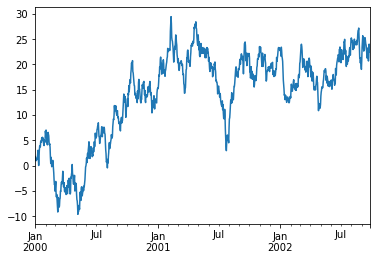

In [53]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

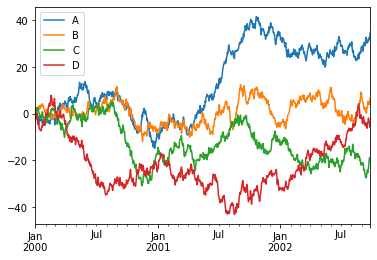

In [54]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')